In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad

In [2]:
def integrand(a, om_m0, om_lam0):
    om_0 = om_m0 + om_lam0
    
    om_matter = om_m0 / a
    curvature = 1 - om_0
    om_lambda = om_lam0 * (a**2)
    
    
    return (om_matter + curvature + om_lambda) ** (-1/2)

In [3]:
def compute_a_and_t(om_m0, om_lam0, iterations):
    """
    Given a density parameter and something else, it returns two arrays:
    - array containg the values of a
    - array containg the values of t
    
    Besides the two arrays, it returns H0 as well.
    
    ## Example
    
    (a_s, t_s, H0) = compute_a_and_t(1, 0)
    
    """
    H = 71
    Mpc = 3.085677581e-19 # kms
    km = 1
#     Gyr= 3.1536e16 # seconds
    H0 = (H * 3.08e-19*3.15e16)
    
    t0 = ((quad(integrand,0, 1, args=(om_m0, om_lam0)))[0]) / H0

    t_s = []
    a_s = []

    for i in range(1, iterations + 1):
        step = i / 10
    
        integral_result = quad(integrand, 0, step, args=(om_m0, om_lam0))[0]
        t = integral_result / H0 
    
        a_s.append(step)
        t_s.append(t)
        
    return (a_s, t_s, H0, t0)

In [49]:
final_results = []
matlamvals = [(0.1, 0.9), (0.27, 0.73), (0.5, 0.5), (0.75, 0.25), (0.9, 0.1)]

for (om_mat, om_lam) in matlamvals:
    (a_s, t_s, H0, t0) = compute_a_and_t(om_mat, om_lam, 1000)
    
    data = {"om_mat": om_mat, "om_lam": om_lam, "a": a_s, "t": t_s, "h": H0, "tzero": t0}
    
    final_results.append(data)        

In [50]:
final_results[0]["h"]
final_results[0]["tzero"]

1.855104529450829

In [51]:
def EdS_verse(t):
    
    return np.sign(t) * (np.abs(t)** (2/3))

def lamdom(t):
    
    return np.exp(t)

def generic(a, om_mat0, om_lam0):
    
    amlam = (om_mat0/om_lam0)**(1/3)
    constexp = 2/(3*np.sqrt(1 - om_mat0))
    afrac = (a/amlam)
        
    return constexp * np.log(afrac ** (3/2) + np.sqrt(1 + afrac ** 3))

In [52]:
generic_results = []
t_s_generic = []

for (om_mat, om_lam) in matlamvals:
    for result in final_results:
        t_s_generic = generic(np.array(result["a"]), om_mat, om_lam) / result["h"]

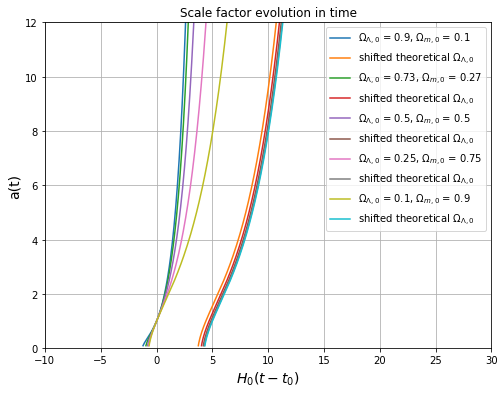

In [54]:
fig = plt.figure(figsize=(8, 6))
plt.title("Scale factor evolution in time")
plt.xlabel(r"$H_0 (t-t_0)$", fontsize = 14)
plt.ylabel("a(t)",fontsize = 14)
plt.grid(True)
plt.xlim(-10,30)
plt.ylim(0,12)

pyomlam = (r"$\Omega_{\Lambda,0}$")
pyommat = (r"$\Omega_{m, 0}$")


for result in final_results:
    plt.plot(result["h"] * (np.array(result["t"]) - result["tzero"]), np.array(result["a"]),
            label = "{pyomlam} = {om_lam}, {pyommat} = {om_mat}".format(
                pyomlam = pyomlam, om_lam = result["om_lam"], pyommat = pyommat, om_mat = result["om_mat"]))
    
    plt.plot(result["h"] * (np.array(t_s_generic) - result["tzero"]) +5, np.array(result["a"]), label = "shifted theoretical {pyomlam}".format(
    pyomlam = pyomlam))
    plt.legend()
    

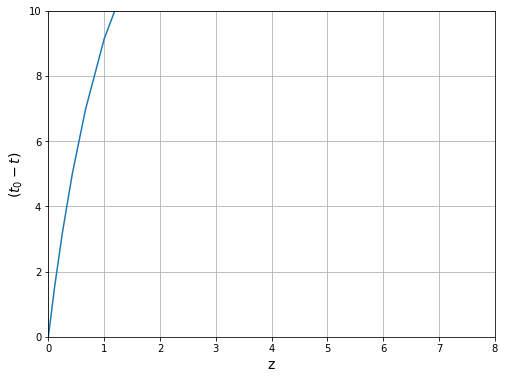

In [28]:
fig = plt.figure(figsize = (8,6))
plt.xlim(0,8)
plt.ylim(0,10)
plt.xlabel("z", fontsize = 14)
plt.ylabel(r"$(t_0 - t)$", fontsize = 14)
for result in final_results:
    plt.plot((np.array(result["a"])**(-1) - 1), 10*(result["tzero"] - np.array(result["t"])))
    plt.grid(True)